In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle (1).json to kaggle (1) (2).json


In [ ]:
!mkdir -p ~/.kaggle
!cp "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub
path = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor-classification-mri


In [ ]:
# Install and use direct kaggle API
!pip install kaggle

# Download the brain tumor dataset
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

# Check if zip file downloaded
import glob
zip_files = glob.glob('*.zip')
print("Downloaded zip files:", zip_files)

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
brain-tumor-classification-mri.zip: Skipping, found more recently modified local copy (use --force to force download)
Downloaded zip files: ['brain-tumor-classification-mri.zip']


In [ ]:
import zipfile
import os
# Extract the dataset
with zipfile.ZipFile('brain-tumor-classification-mri.zip', 'r') as zip_ref:
    zip_ref.extractall('brain_tumor_dataset')

In [ ]:
# Now update your original data exploration code
import os

# Set correct base directory
base_dir = 'brain_tumor_dataset/'

# Find the actual folder structure
contents = os.listdir(base_dir)
print("Contents of extracted dataset:", contents)

# Usually the structure will be like:
# brain_tumor_dataset/Training/ and brain_tumor_dataset/Testing/
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')

Contents of extracted dataset: ['Training', 'Testing']


In [ ]:
# Define paths for all classes
if os.path.exists(train_dir) and os.path.exists(test_dir):
    # Get actual class names from directories
    train_classes = os.listdir(train_dir)
    test_classes = os.listdir(test_dir)

    print("Available classes:", train_classes)

    # Create file lists for each class
    train_files = {}
    test_files = {}

    for class_name in train_classes:
        train_path = os.path.join(train_dir, class_name)
        test_path = os.path.join(test_dir, class_name)

        if os.path.exists(train_path):
            train_files[class_name] = [os.path.join(train_path, f)
                                     for f in os.listdir(train_path)
                                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if os.path.exists(test_path):
            test_files[class_name] = [os.path.join(test_path, f)
                                    for f in os.listdir(test_path)
                                    if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        print(f"{class_name}: {len(train_files.get(class_name, []))} train, {len(test_files.get(class_name, []))} test")

    # Calculate totals
    total_train = sum(len(files) for files in train_files.values())
    total_test = sum(len(files) for files in test_files.values())

    print(f"\nTotal training images: {total_train}")
    print(f"Total testing images: {total_test}")
    print(f"Total images: {total_train + total_test}")

Available classes: ['meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor']
meningioma_tumor: 822 train, 115 test
pituitary_tumor: 827 train, 74 test
glioma_tumor: 826 train, 100 test
no_tumor: 395 train, 105 test

Total training images: 2870
Total testing images: 394
Total images: 3264


In [ ]:
#import necessary libraries when needed
import os
import numpy as np
import pandas as pd
import pathlib
import imageio

In [ ]:
# Define paths for all classes
if os.path.exists(train_dir) and os.path.exists(test_dir):
    # Get actual class names from directories
    train_classes = os.listdir(train_dir)
    test_classes = os.listdir(test_dir)

    print("Available classes:", train_classes)

    # Create file lists for each class
    train_files = {}
    test_files = {}

    for class_name in train_classes:
        train_path = os.path.join(train_dir, class_name)
        test_path = os.path.join(test_dir, class_name)

        if os.path.exists(train_path):
            train_files[class_name] = [os.path.join(train_path, f)
                                     for f in os.listdir(train_path)
                                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if os.path.exists(test_path):
            test_files[class_name] = [os.path.join(test_path, f)
                                    for f in os.listdir(test_path)
                                    if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        print(f"{class_name}: {len(train_files.get(class_name, []))} train, {len(test_files.get(class_name, []))} test")

    # Calculate totals
    total_train = sum(len(files) for files in train_files.values())
    total_test = sum(len(files) for files in test_files.values())

    print(f"\nTotal training images: {total_train}")
    print(f"Total testing images: {total_test}")
    print(f"Total images: {total_train + total_test}")

Available classes: ['meningioma_tumor', 'pituitary_tumor', 'glioma_tumor', 'no_tumor']
meningioma_tumor: 822 train, 115 test
pituitary_tumor: 827 train, 74 test
glioma_tumor: 826 train, 100 test
no_tumor: 395 train, 105 test

Total training images: 2870
Total testing images: 394
Total images: 3264


In [ ]:
# Exploring brain tumor dataset - CORRECTED VERSION FOR COLAB
import os

# Use the correct Colab path from your output
base_dir = '/content/brain_tumor_dataset'
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')

# Define paths for 4 brain tumor classes using ACTUAL folder names
train_glioma_dir = os.path.join(train_dir, 'glioma_tumor')
train_meningioma_dir = os.path.join(train_dir, 'meningioma_tumor')
train_pituitary_dir = os.path.join(train_dir, 'pituitary_tumor')
train_notumor_dir = os.path.join(train_dir, 'no_tumor')

test_glioma_dir = os.path.join(test_dir, 'glioma_tumor')
test_meningioma_dir = os.path.join(test_dir, 'meningioma_tumor')
test_pituitary_dir = os.path.join(test_dir, 'pituitary_tumor')
test_notumor_dir = os.path.join(test_dir, 'no_tumor')

# Create file lists for each class
train_glioma = [os.path.join(train_glioma_dir, f) for f in os.listdir(train_glioma_dir)]
train_meningioma = [os.path.join(train_meningioma_dir, f) for f in os.listdir(train_meningioma_dir)]
train_pituitary = [os.path.join(train_pituitary_dir, f) for f in os.listdir(train_pituitary_dir)]
train_notumor = [os.path.join(train_notumor_dir, f) for f in os.listdir(train_notumor_dir)]

test_glioma = [os.path.join(test_glioma_dir, f) for f in os.listdir(test_glioma_dir)]
test_meningioma = [os.path.join(test_meningioma_dir, f) for f in os.listdir(test_meningioma_dir)]
test_pituitary = [os.path.join(test_pituitary_dir, f) for f in os.listdir(test_pituitary_dir)]
test_notumor = [os.path.join(test_notumor_dir, f) for f in os.listdir(test_notumor_dir)]

# Print dataset statistics
total_train = train_glioma + train_meningioma + train_pituitary + train_notumor
total_test = test_glioma + test_meningioma + test_pituitary + test_notumor

print("=== Brain Tumor Dataset Statistics ===")
print("Total training images:", len(total_train))
print("Total testing images:", len(total_test))
print("Total images:", len(total_train + total_test))

=== Brain Tumor Dataset Statistics ===
Total training images: 2870
Total testing images: 394
Total images: 3264


In [ ]:
import cv2
import numpy as np

def preprocess_brain_mri(image_paths, labels, img_size=224):
    X = []
    y = []
    for img_path, label in zip(image_paths, labels):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size))
        img = np.stack((img,)*3, axis=-1)  # convert to 3 channels
        img = img.astype(np.float32) / 255.0
        X.append(img)
        y.append(label)
    return np.array(X), np.array(y)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

img_size = 224
num_classes = 4  # no_tumor, pituitary, glioma, meningioma

# Load VGG16 base model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze base model layers initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',  # use sparse if labels are integers
              metrics=['accuracy'])


In [ ]:
import os

# Define class mapping
classes = {'no_tumor': 0, 'pituitary_tumor': 1, 'glioma_tumor': 2, 'meningioma_tumor': 3}
base_dir = '/content/brain_tumor_dataset/Training'  # adjust path as needed

image_paths = []
labels = []

for cls, label in classes.items():
    folder = os.path.join(base_dir, cls)
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')):
            image_paths.append(os.path.join(folder, filename))
            labels.append(label)

print(f"Total images found: {len(image_paths)}")
print(f"Sample paths: {image_paths[:3]}")
print(f"Sample labels: {labels[:3]}")


Total images found: 2870
Sample paths: ['/content/brain_tumor_dataset/Training/no_tumor/image (50).jpg', '/content/brain_tumor_dataset/Training/no_tumor/image(327).jpg', '/content/brain_tumor_dataset/Training/no_tumor/image(122).jpg']
Sample labels: [0, 0, 0]


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(image_paths, labels, test_size=0.15, random_state=42, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)

In [ ]:
def preprocess_images(image_paths, labels, img_size=224):
    X = []
    y = []
    for img_path, label in zip(image_paths, labels):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size))
        img = np.stack((img,)*3, axis=-1)  # Grayscale to 3 channels
        img = img.astype(np.float32) / 255.0
        X.append(img)
        y.append(label)
    return np.array(X), np.array(y)

X_train, y_train = preprocess_images(X_train, y_train)
X_val, y_val = preprocess_images(X_val, y_val)
X_test, y_test = preprocess_images(X_test, y_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
SEED = 10
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

train_datagen = ImageDataGenerator(rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)


In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=64)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 541ms/step - accuracy: 0.2866 - loss: 1.5073 - val_accuracy: 0.4524 - val_loss: 1.3188
Epoch 2/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 484ms/step - accuracy: 0.3180 - loss: 1.3814 - val_accuracy: 0.5452 - val_loss: 1.2779
Epoch 3/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 491ms/step - accuracy: 0.3601 - loss: 1.3234 - val_accuracy: 0.5476 - val_loss: 1.2459
Epoch 4/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 483ms/step - accuracy: 0.3897 - loss: 1.2895 - val_accuracy: 0.6009 - val_loss: 1.2163
Epoch 5/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 507ms/step - accuracy: 0.4267 - loss: 1.2416 - val_accuracy: 0.6172 - val_loss: 1.1894
Epoch 6/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 481ms/step - accuracy: 0.4552 - loss: 1.2025 - val_accuracy: 0.6056 - val_loss: 1.1612
Epoch 7/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 499ms/step - accuracy: 0.5404 - loss: 1.1598 - val_accuracy: 0.6265 - val_loss: 1.1351
Epoch 8/64
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 482ms/step - accuracy: 0.5199 - loss: 1.1506 - val_accu

In [ ]:
import numpy as np

# Get model predictions (assuming y_test is your true labels)
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # for softmax output (multi-class)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

# Assume y_test and y_pred are defined
target_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Classification report as DataFrame for formatting
report_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
report_df = pd.DataFrame(report_dict).T

# Compute specificity for each class
cm = confusion_matrix(y_test, y_pred)
specificity = []
for i in range(len(cm)):
    tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))
    fp = np.sum(np.delete(cm, i, axis=0)[:, i])
    specificity.append(tn / (tn + fp) if (tn + fp) > 0 else 0)
report_df['specificity'] = np.nan
for idx, spec in enumerate(specificity):
    report_df.loc[target_names[idx], 'specificity'] = spec

# Format as percentage with 2 decimals
for col in ['precision', 'recall', 'specificity', 'f1-score']:
    report_df[col] = (report_df[col] * 100).round(2).astype(str) + '%'
report_df['support'] = report_df['support'].astype(int)

# Print formatted report
print("============ CLASSIFICATION REPORT =============")
print(report_df[['precision', 'recall', 'specificity', 'f1-score']].to_string())


============ CLASSIFICATION REPORT =============
                 precision  recall specificity f1-score
glioma_tumor         87.5%  83.05%      98.12%   85.22%
meningioma_tumor     75.0%  99.19%      86.64%   85.42%
no_tumor            89.91%  79.03%      96.42%   84.12%
pituitary_tumor     74.51%  61.29%      91.53%   67.26%
accuracy            80.28%  80.28%        nan%   80.28%
macro avg           81.73%  80.64%        nan%    80.5%
weighted avg        80.86%  80.28%        nan%   79.79%


In [ ]:
# For training accuracy (use history.history['accuracy'][-1] for last epoch)
train_acc = history.history['accuracy'][-1]
print("\n============ TRAINING METRIC =============")
print(f"Train Accuracy: {train_acc*100:.2f}%")


============ TRAINING METRIC =============
Train Accuracy: 76.05%


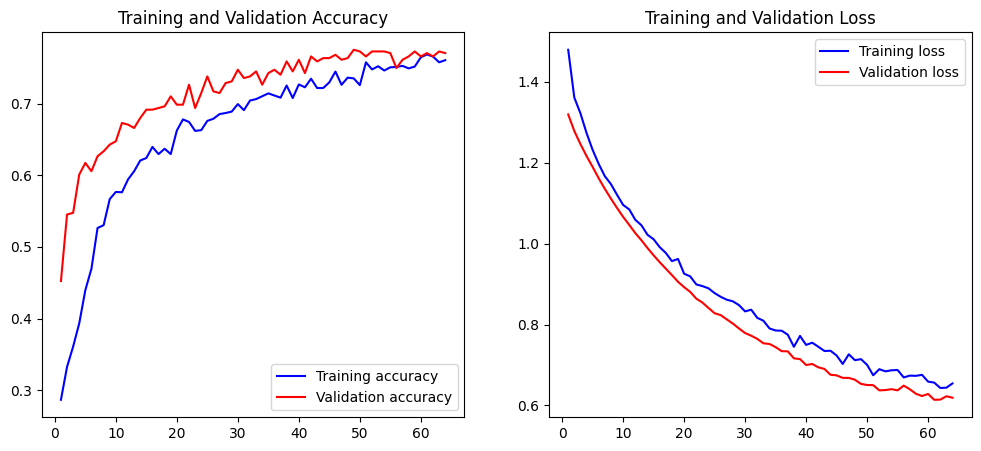

In [ ]:
# Plot training and validation curves
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()